In [1]:
import os
import data_loader
from criteria import PSNR, SSIM, show_img_in_loader_and_comparison, test_psnr_ssim_interpolation
from ESPCN_model import get_ESPCN_model, ESPCN_train, test_one_picture_in_val_set
from plot import show_img

#### path define

In [2]:
base_path = r"D:\programming\dataset\DIV2K"
valid_hr = os.path.join(base_path, "DIV2K_valid_HR")
valid_lr = os.path.join(base_path, "DIV2K_valid_LR_bicubic_X2")
h5_train_path = os.path.join(base_path, "Y_channel_data_ESPCN")
model_save_path = os.path.join(base_path, "ESPCN.model")

#### data loader

In [3]:
train_dataloader, val_dataloader = data_loader.create_train_val_data_loader(h5_train_path, valid_hr, valid_lr)

#### define net

In [4]:
model, device, current_epoch, PSNR_list, SSIM_list = get_ESPCN_model(model_save_path=model_save_path)

load model parameter
use device:  cuda:0


#### train

In [5]:
ESPCN_train(model, device, train_dataloader, val_dataloader,
               current_epoch, PSNR_list, SSIM_list, model_save_path,
               max_epoch=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 217400/217400 [00:00<?, ?it/s]


#### output the PSNR_list and SSIM_list

In [6]:
#for i in range(len(PSNR_list)-10, len(PSNR_list)):
for i in range(len(PSNR_list)):
    print("epoch: {}, PSNR: {:.5f}, SSIM: {:.5f}".format(i+1,PSNR_list[i],SSIM_list[i]))

epoch: 1, PSNR: 30.58066, SSIM: 0.89387
epoch: 2, PSNR: 31.56565, SSIM: 0.91377
epoch: 3, PSNR: 31.42541, SSIM: 0.90886
epoch: 4, PSNR: 32.09130, SSIM: 0.91671
epoch: 5, PSNR: 31.78396, SSIM: 0.91715
epoch: 6, PSNR: 32.33299, SSIM: 0.91993
epoch: 7, PSNR: 27.33407, SSIM: 0.90111
epoch: 8, PSNR: 32.44717, SSIM: 0.92028
epoch: 9, PSNR: 30.32080, SSIM: 0.91806
epoch: 10, PSNR: 32.52362, SSIM: 0.91968
epoch: 11, PSNR: 32.62133, SSIM: 0.92164
epoch: 12, PSNR: 32.65700, SSIM: 0.92251
epoch: 13, PSNR: 31.59998, SSIM: 0.92281
epoch: 14, PSNR: 32.52448, SSIM: 0.92137
epoch: 15, PSNR: 32.75102, SSIM: 0.92317
epoch: 16, PSNR: 32.77564, SSIM: 0.92391
epoch: 17, PSNR: 32.71570, SSIM: 0.92342
epoch: 18, PSNR: 32.73798, SSIM: 0.92294
epoch: 19, PSNR: 32.77927, SSIM: 0.92320
epoch: 20, PSNR: 32.78268, SSIM: 0.92343
epoch: 21, PSNR: 32.80913, SSIM: 0.92386
epoch: 22, PSNR: 32.74363, SSIM: 0.92413
epoch: 23, PSNR: 32.78039, SSIM: 0.92364
epoch: 24, PSNR: 32.40373, SSIM: 0.92334
epoch: 25, PSNR: 32.62932

#### test for one picture in the validation set

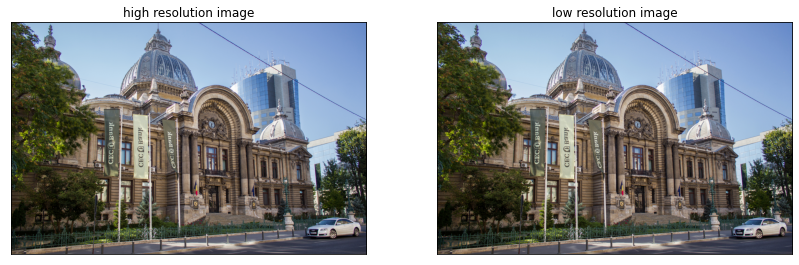

Y channel PSNR value after interpolation: 29.257
Y channel PSNR value after ESPCN: 30.859
Y channel SSIM value after interpolation: 0.891
Y channel SSIM value after ESPCN: 0.921


In [7]:
test_one_picture_in_val_set(model, device, val_dataloader, save_dir="save_img",
                            img_number=3)